# **Sports Prediction**

- Sports prediction is usually treated as a classification problem, with one 
class (win, lose, or draw) to be predicted. 

- In sports prediction, large numbers of factors including the historical performance of the teams, results of matches, and data on players, have to be accounted for to help different stakeholders understand the odds of winning or losing.


In [2]:
# import neccessary  global libraries 
import numpy as np  # linear algebra
import pandas as pd #  data processesing
import matplotlib.pyplot as plt  # data plotting and visualizations
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


# Data Preparations and Exploratory Analysis

- The Data i would be using for this assignment is FIFA 19 datasets that contains all attributes of football players as per the fifa ranking in the year 2019. 
[FIFA 19 DATASET](https://www.kaggle.com/jyoshika/starter-fifa-19-complete-player-66530d33-7/data)

- The FIFA 19 is the most famous and played soccer game around the whole world with over 1.2 billion players. The game contains more than 70000 players in their databases.

- The data set presented in this challenge contains more than 18000 players with their different features from physical appearence, clubs, wages and their performance. Our goal is to take those feature and predict the player position correctly.




**Data Retrieval and reading**





In [3]:
# import the dataset
# data.csv has 18207 rows in reality, but we are only loading/previewing the first 1000 rows for preprocessing
nRowsRead = 1000 # specify 'None' if want to read whole file

FIFA_data =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sports Predictions/data.csv', index_col=[0],  delimiter= ',' , nrows = nRowsRead)



FIFA_data.dataframeName = 'data.csv'
nRow, nCol = FIFA_data.shape



**Data types and Numerics explorations**

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

print("Number of numberic attributes - " + str(len(FIFA_data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns)))
print("Number of categorical attributes - " + str(len(FIFA_data.select_dtypes(include=['object']).columns)))
print(f'There are {len(FIFA_data)} rows (players) and  {len(FIFA_data.columns)} Columns')



Number of numberic attributes - 43
Number of categorical attributes - 45
There are 1000 rows (players) and  88 Columns


**FEATURE CORRELATIONS**

Let's correlate features, with the following steps;


*   drop the categorical columns
*   Plotting different features
*   Analyse different features


In [5]:
#print data head
FIFA_data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5,4,5,High/ Low,C. Ronaldo,Yes,ST,7,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5,5,5,High/ Medium,Neymar,Yes,LW,10,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4,3,1,Medium/ Medium,Lean,Yes,GK,1,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4,5,4,High/ High,Normal,Yes,RCM,7,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13,€196.4M


**Describe the Datasets attributes and values**




In [6]:
FIFA_data.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,193376.026000,27.374000,80.625000,82.507000,1906.927000,2.143000,3.272000,3.001000,14.412000,62.462000,58.251000,61.212000,72.632000,57.085000,68.632000,61.97300,55.907000,66.678000,72.234000,69.792000,69.867000,70.15600,78.217000,67.421000,69.052000,70.173000,71.926000,71.021000,61.670000,66.327000,57.466000,62.92200,68.897000,59.014000,75.023000,56.791000,56.316000,53.040000,18.209000,17.913000,17.44400,17.93700,18.290000
std,31251.621976,3.763015,3.038026,3.750469,262.626206,0.866777,0.748717,1.038305,12.589072,20.960914,22.386629,20.638484,15.050751,21.490175,20.984826,21.65824,21.096194,15.306751,18.610685,14.165854,13.533013,13.94066,4.522429,14.868182,18.329137,11.603522,15.299693,11.318952,21.682187,17.835587,23.700687,22.97668,13.582816,18.134074,8.223631,23.119209,25.570373,25.883399,22.318006,21.489049,20.17776,21.98218,22.782162
min,41.000000,18.000000,77.000000,77.000000,1060.000000,1.000000,1.000000,1.000000,1.000000,8.000000,6.000000,7.000000,11.000000,8.000000,8.000000,9.00000,8.000000,12.000000,9.000000,30.000000,31.000000,29.00000,62.000000,24.000000,14.000000,30.000000,18.000000,30.000000,7.000000,11.000000,10.000000,4.00000,15.000000,9.000000,20.000000,7.000000,9.000000,8.000000,1.000000,1.000000,1.00000,1.00000,1.000000
25%,182855.500000,25.000000,78.000000,80.000000,1859.500000,2.000000,3.000000,2.000000,7.000000,54.000000,45.000000,53.000000,72.000000,44.000000,64.000000,50.00000,43.000000,61.000000,72.000000,62.000000,62.000000,62.00000,75.000000,57.750000,66.000000,64.000000,68.000000,64.000000,54.000000,57.000000,35.000000,53.00000,61.000000,49.000000,71.000000,36.000000,32.000000,27.000000,8.000000,8.000000,8.00000,8.00000,8.000000
50%,199197.500000,27.000000,80.000000,82.000000,1977.500000,2.000000,3.000000,3.000000,11.000000,70.000000,65.000000,67.000000,77.000000,64.000000,76.000000,69.00000,61.000000,71.000000,79.000000,72.000000,72.000000,72.00000,78.000000,70.000000,76.000000,72.000000,75.000000,72.000000,70.000000,72.000000,67.000000,73.00000,73.000000,63.000000,76.000000,63.000000,65.000000,61.000000,11.000000,11.000000,11.00000,11.00000,11.000000
75%,211332.000000,30.000000,82.000000,85.000000,2067.000000,3.000000,4.000000,4.000000,19.000000,77.000000,76.000000,76.000000,81.000000,74.000000,82.000000,78.00000,73.000000,77.000000,82.000000,79.000000,79.000000,79.00000,81.000000,78.000000,80.250000,78.000000,82.000000,79.000000,77.000000,80.000000,79.000000,79.00000,79.000000,73.000000,80.000000,77.000000,80.000000,77.250000,14.000000,14.000000,14.00000,14.00000,14.000000
max,244369.000000,40.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.00000,94.000000,93.000000,96.000000,97.000000,96.000000,96.00000,96.000000,96.000000,95.000000,95.000000,96.000000,94.000000,94.000000,94.000000,92.000000,95.00000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.00000,90.00000,94.000000


**Examining missing values**

In [7]:
#import the missing value attribute library..
# for more or reference to library (https://github.com/ResidentMario/missingno)
import missingno as msno

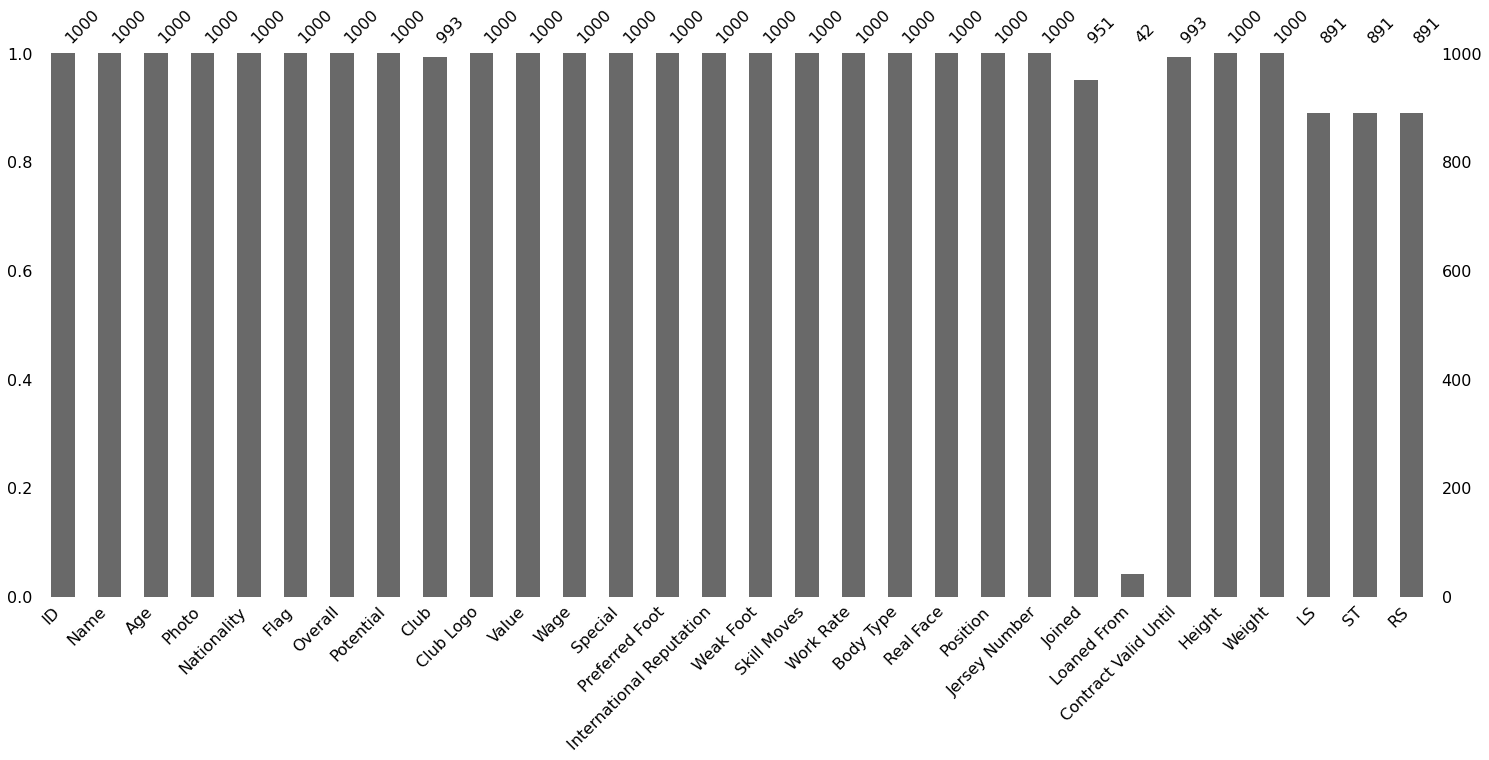

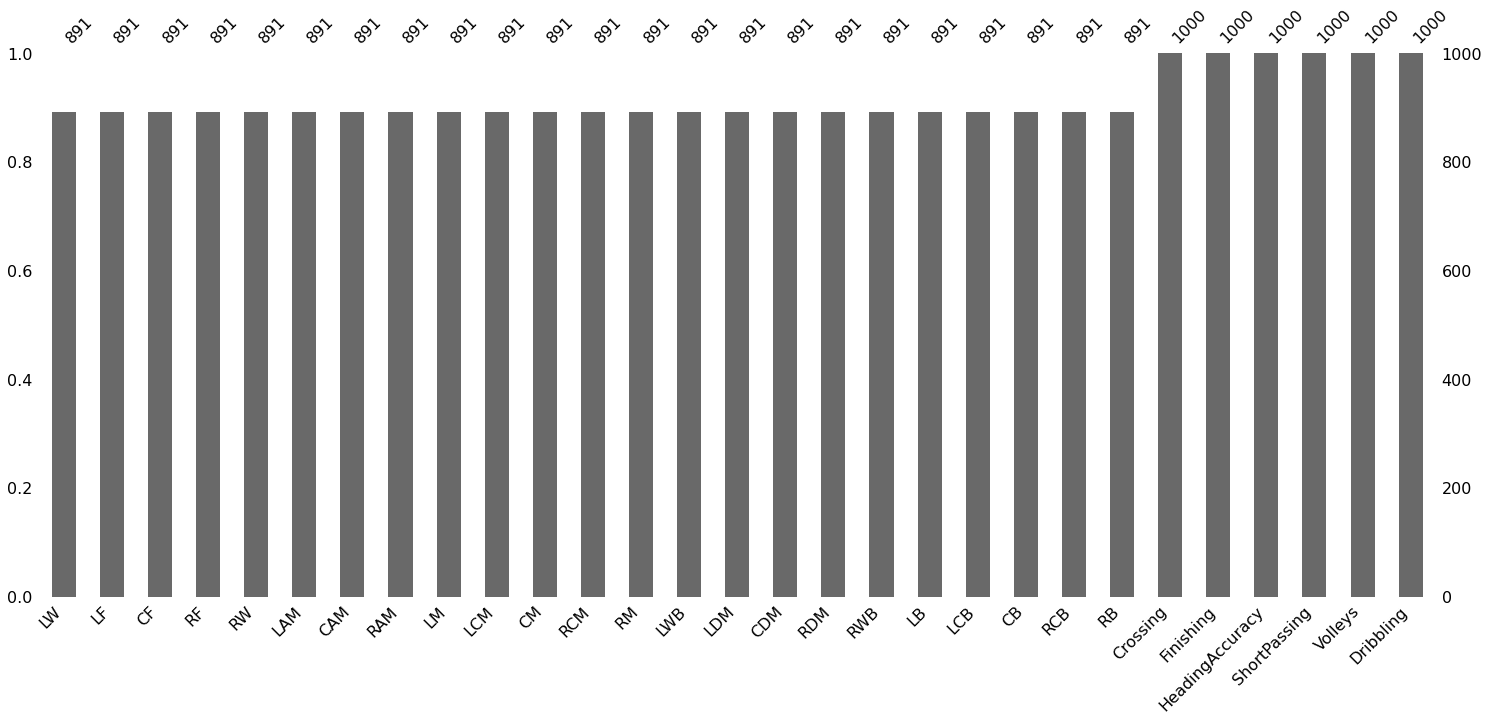

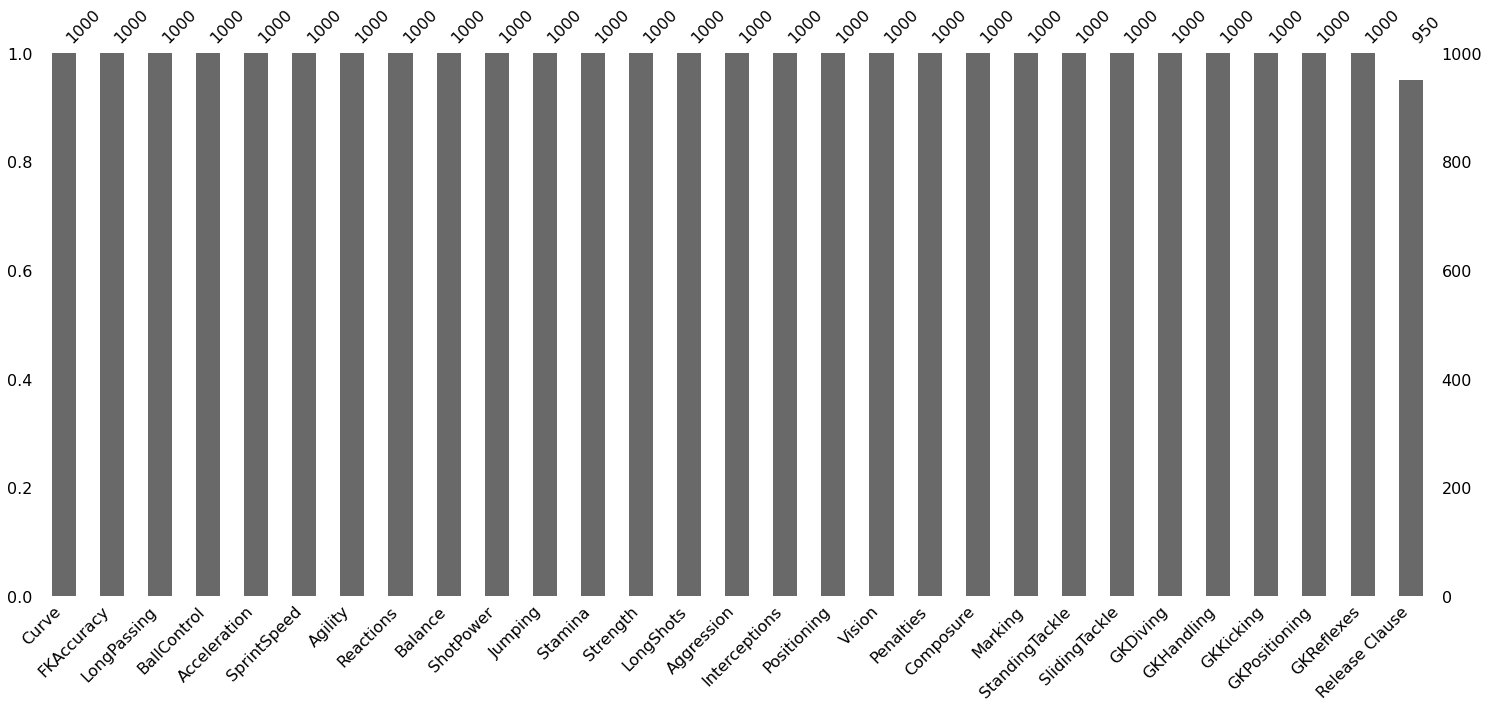

In [8]:
plot_count = 3
column_groups = np.array_split(FIFA_data.columns, plot_count)

for columns in column_groups:
    msno.bar(FIFA_data[columns])
    plt.show()

According to the nature of the dataset and the analysis above, i noticed the following:
- **Club** - some players in the datasets are free agents, this means that they don't belong to any club.

- **Jersey Number** - suprisingly, some players have Jersey number even tho not belonging to any club.

- **Joined** - shows that a player joined a club. can't seem to understand why there's a missing value in this.

- **Loaned From** - it becomes apparent that not every player is loaned out anywhere.
- **Contract Valid Until** - some values are missing specifically to those who are not having a valid club or belong to one.
- **LS, ST, RS, LW, LF, CF, RW, LAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, RDM, LB, LCB, RCB, RB** - I understand that every player has a position to play but seems to have some missing values in the field.
- **Release Clause** - some players can have a release clause in their contract.








In [9]:

def plot_categoric_attribute(data_frame, column, **kwargs):
    count = kwargs.get('count', 10)

    plt.xticks(rotation=90)
    tmp_data = data_frame[column].value_counts(normalize=True).rename('percentage').reset_index().sort_values(
        by='percentage', ascending=False)[:count]
    ax = sns.barplot(x="index", y="percentage", data=tmp_data)
    ax.set_title(f'Top {count} values in {column}')


def plot_discrete_attribute(data_frame, column):
    sns.boxplot(x=column, data=data_frame)


def heat_map(data_frame, **kwargs):
    figsize = kwargs.get('figsize', (10, 10))

    corr = data_frame.corr()
    fig, ax = plt.subplots(figsize=figsize)

    # Generate Color Map
    drop_self = np.zeros_like(corr)
    drop_self[np.triu_indices_from(drop_self)] = True  # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    # Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=drop_self)

    # Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);

    # Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)

    # show plot
    plt.show()

    return fig

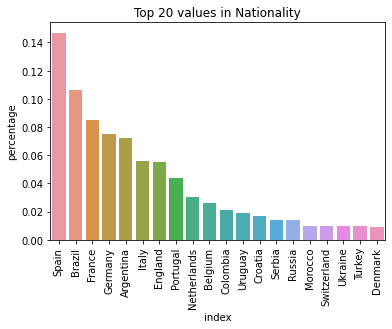

In [10]:
plot_categoric_attribute(FIFA_data, 'Nationality', count=20)

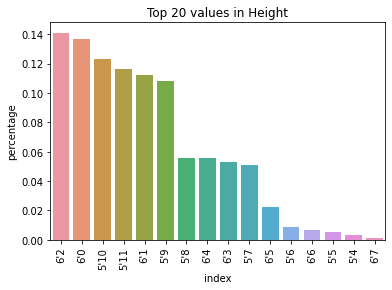

In [11]:
plot_categoric_attribute(FIFA_data, 'Height', count=20)

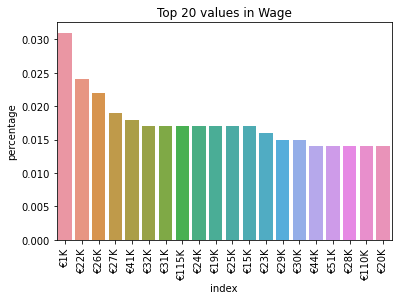

In [12]:
plot_categoric_attribute(FIFA_data, 'Wage', count=20)

From the analysis above, 

- I noticed that the most players in the game are from England which can attest that most of players are from English league.
- Looking at the correlations and similarities in the wages and players we see that the percentage of players in inversely proportional to the wages offered.


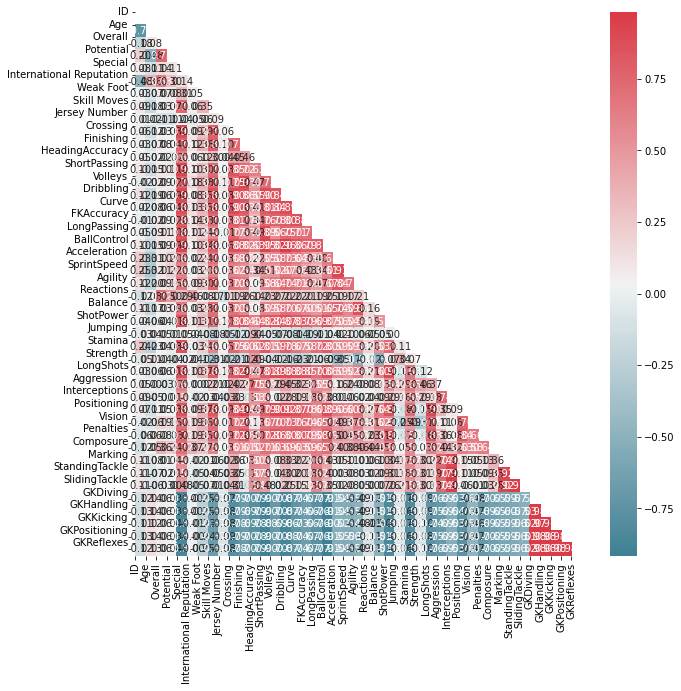

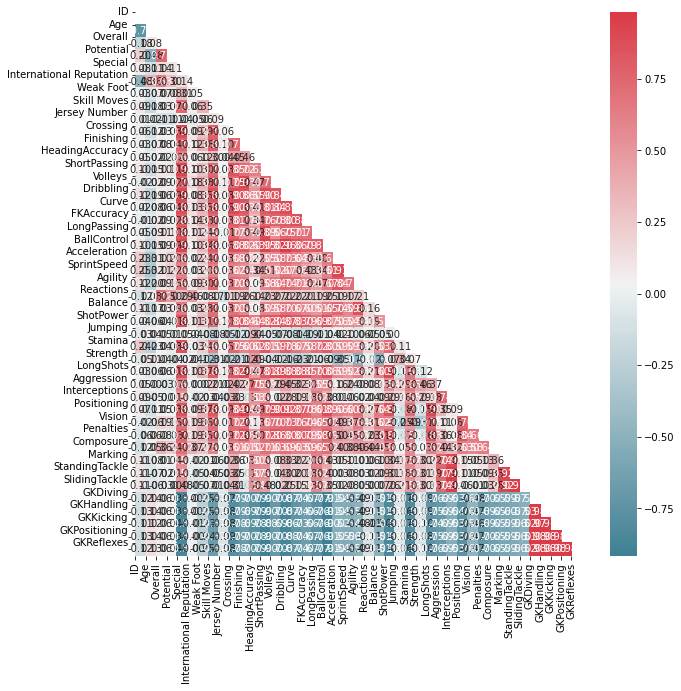

In [13]:
heat_map(FIFA_data)


In [14]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

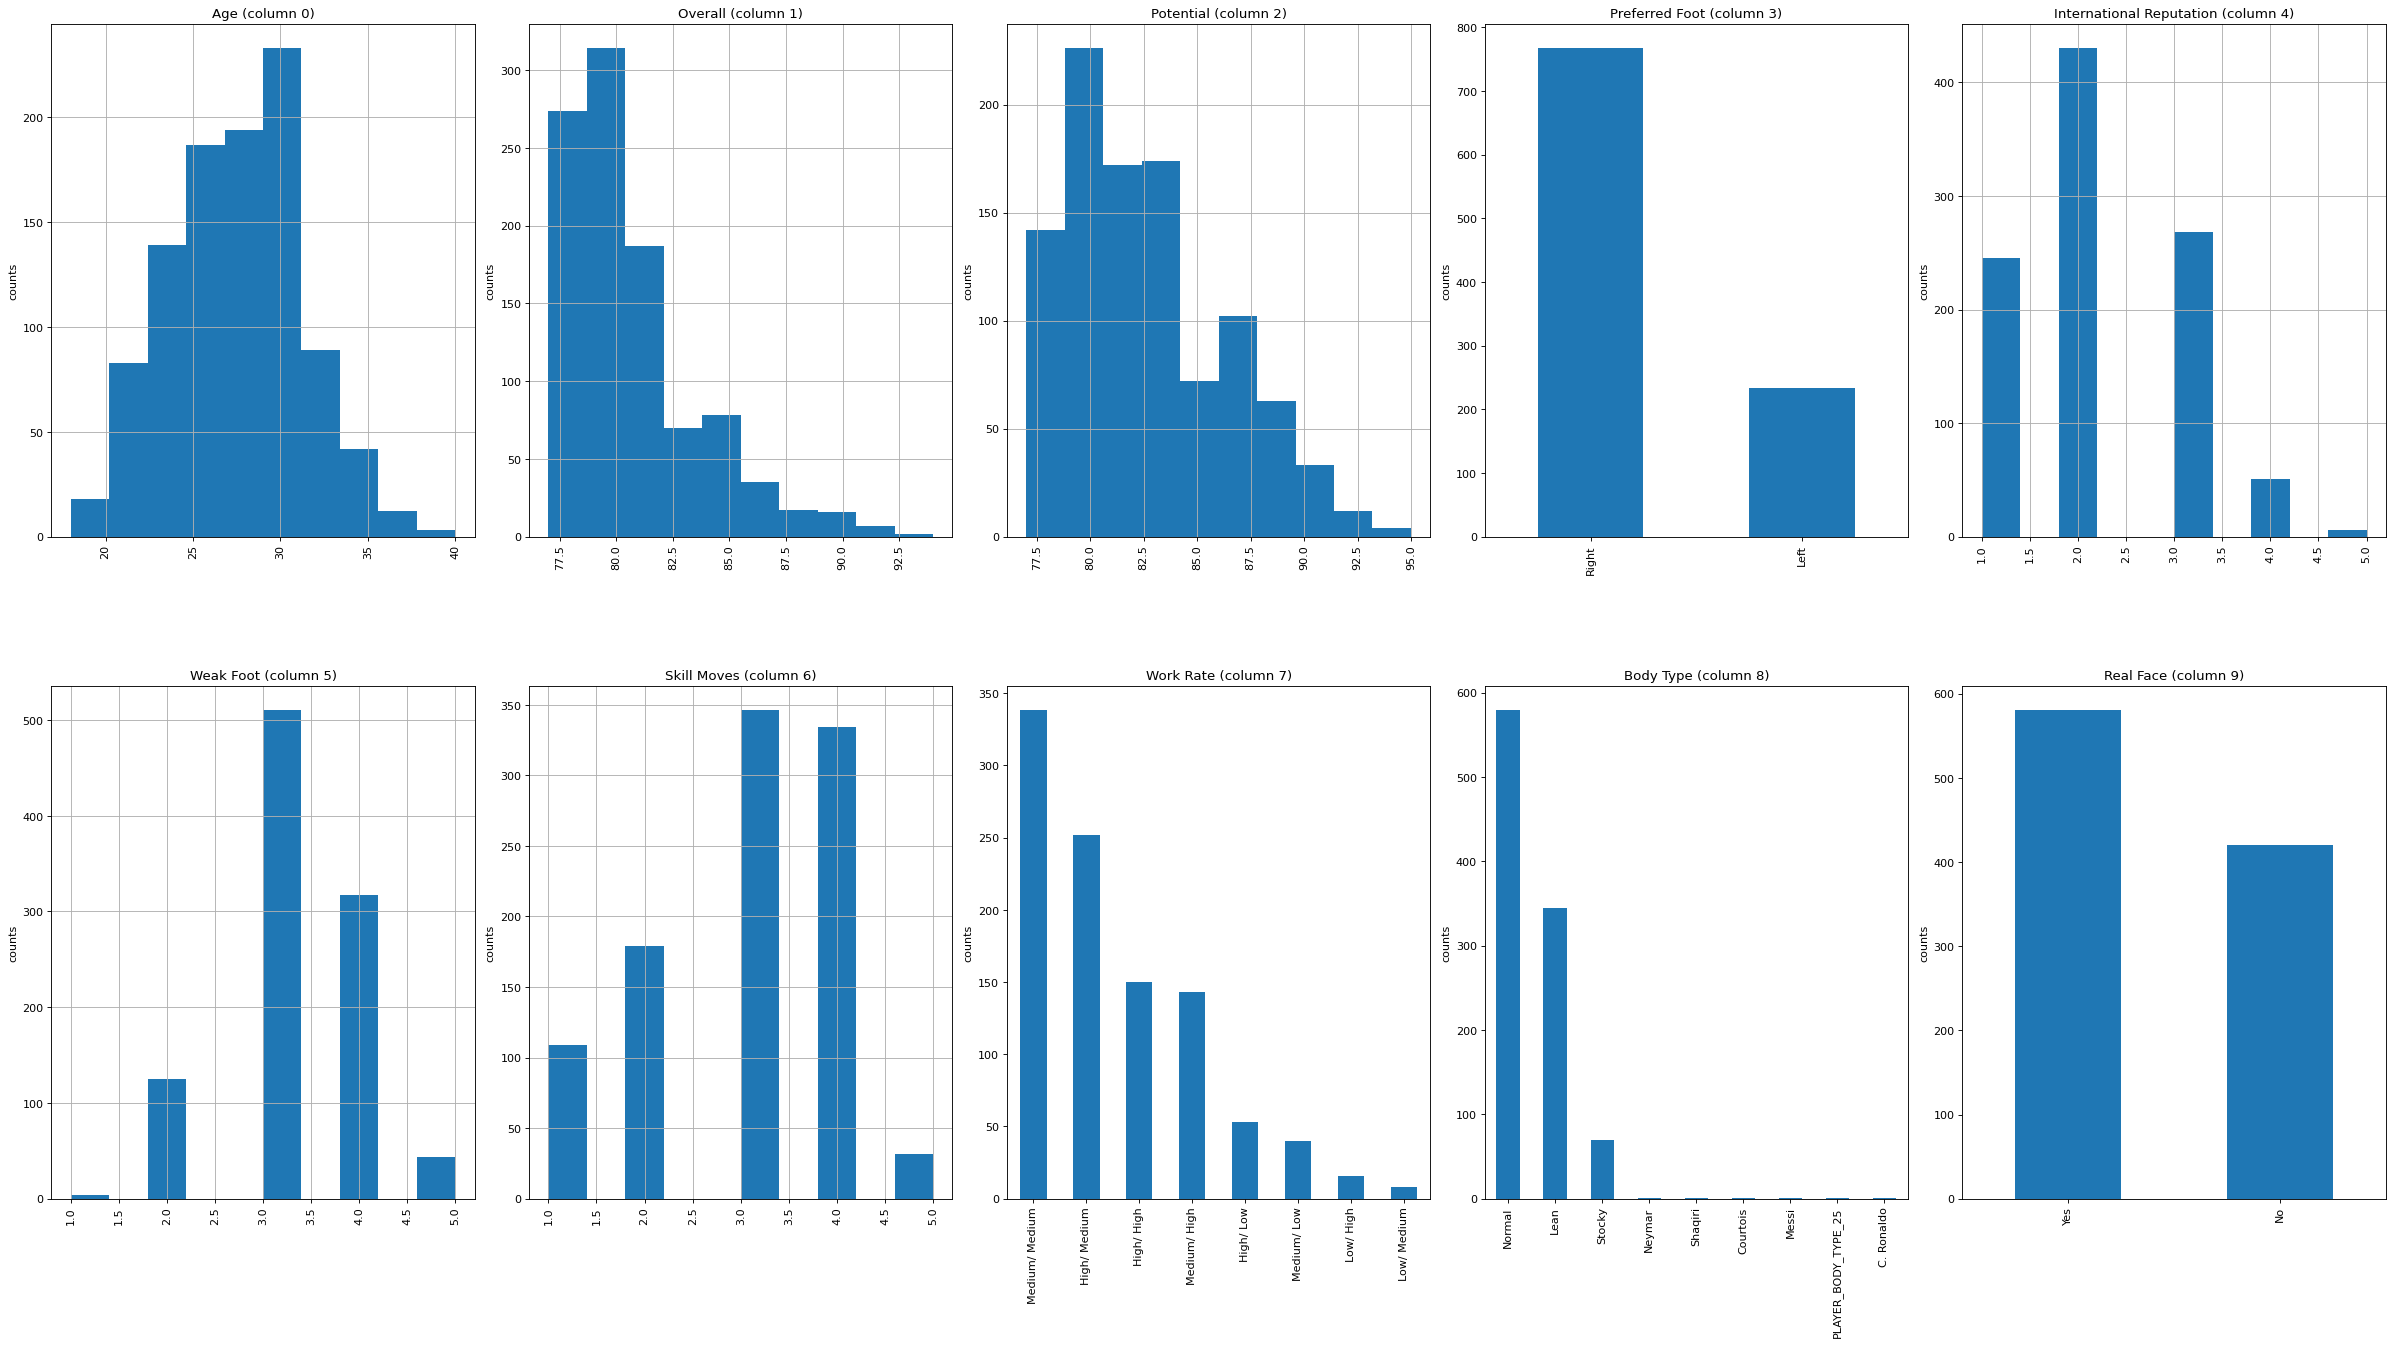

In [15]:
plotPerColumnDistribution(FIFA_data, 10, 5)

In [16]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = FIFA_data
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

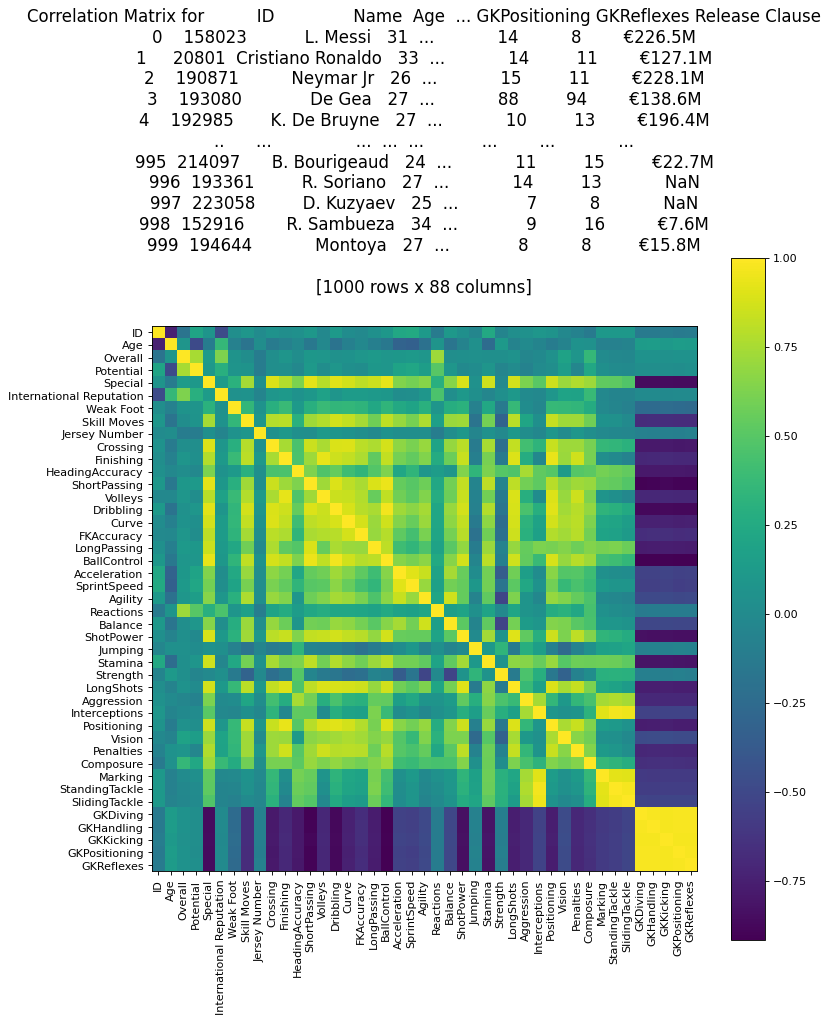

In [17]:
plotCorrelationMatrix(FIFA_data, 11)



In [18]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

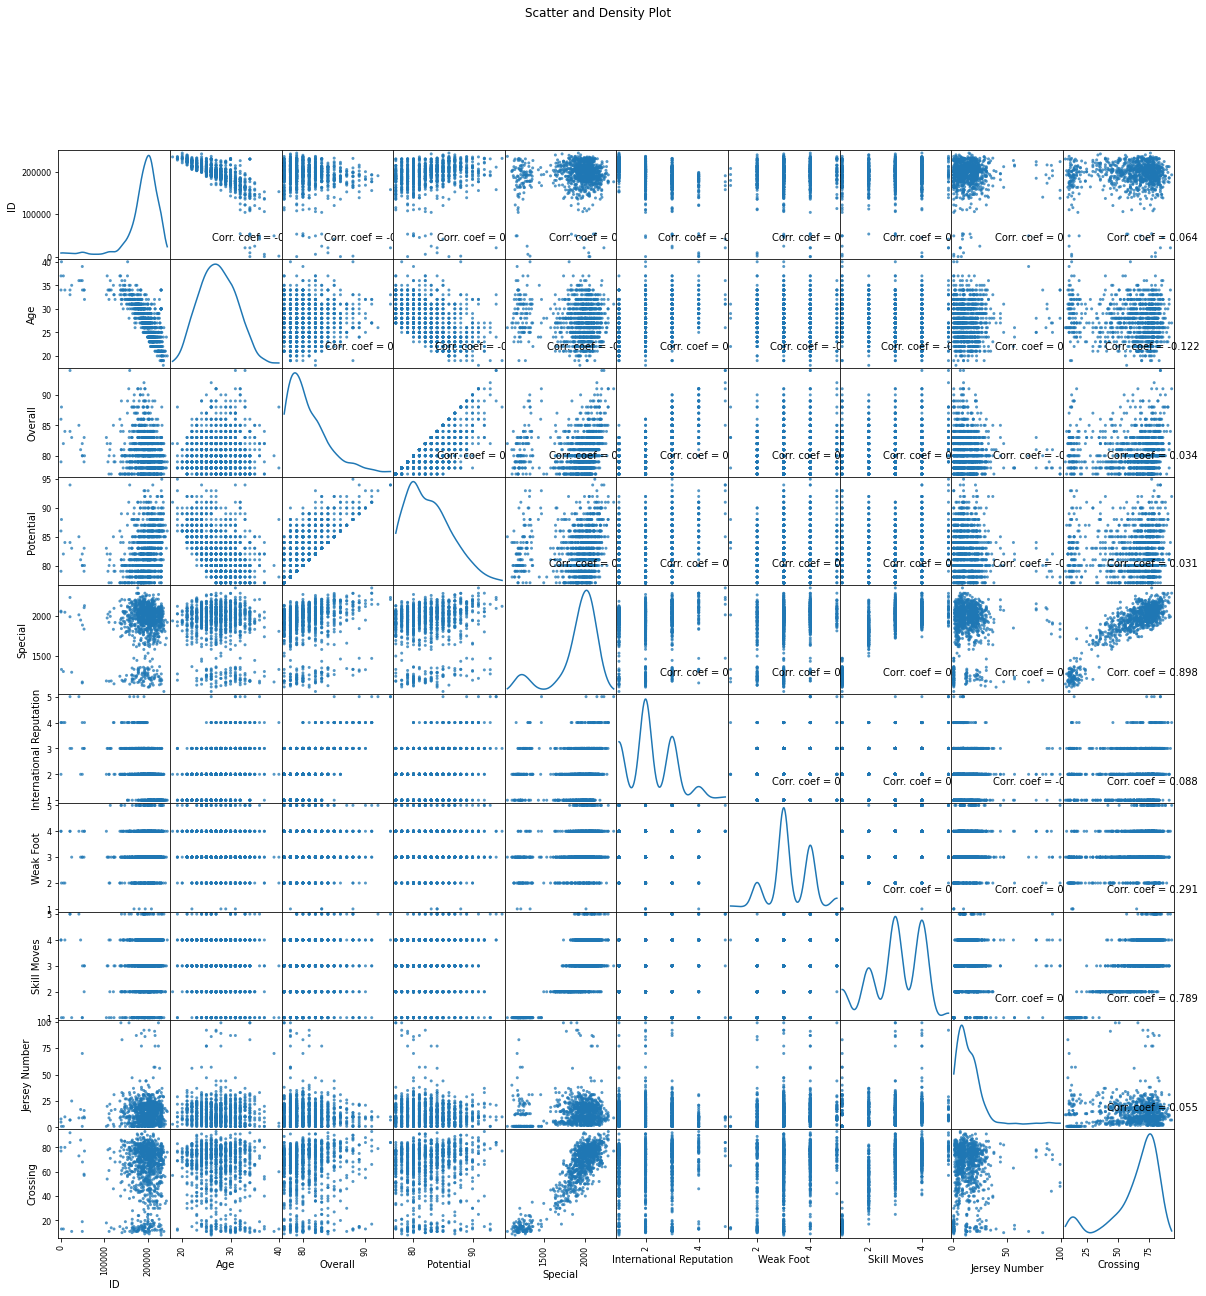

In [19]:
plotScatterMatrix(FIFA_data, 20, 10)


# Data Pre-processing and Analysis
- In this part, I will be taking a process of transforming the available raw rxplored data into an understandable format that a machine learning algorithim can understand.

- This will be done to ensure the quality of the data before applying machine learning or data mining algorithms. 



In [20]:
#Imputation
def impute_data(df):
    df.dropna(inplace=True)


In [21]:
# Coversion weight to int
def weight_to_int(df):
    df['Weight'] = df['Weight'].str[:-3]
    df['Weight'] = df['Weight'].apply(lambda x: int(x))
    return df

In [22]:
# Coversion height to int
def height_convert(df_height):
        try:
            feet = int(df_height[0])
            dlm = df_height[-2]
            if dlm == "'":
                height = round((feet * 12 + int(df_height[-1])) * 2.54, 0)
            elif dlm != "'":
                height = round((feet * 12 + int(df_height[-2:])) * 2.54, 0)
        except ValueError:
            height = 0
        return height

In [23]:
def height_to_int(df):
    df['Height'] = df['Height'].apply(height_convert)

In [24]:
FIFA_data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5,4,5,High/ Low,C. Ronaldo,Yes,ST,7,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5,5,5,High/ Medium,Neymar,Yes,LW,10,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4,3,1,Medium/ Medium,Lean,Yes,GK,1,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4,5,4,High/ High,Normal,Yes,RCM,7,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13,€196.4M


In [25]:
#One Hot Encoding of a feature
def one_hot_encoding(df,column):
    encoder = preprocessing.LabelEncoder()
    df[column] = encoder.fit_transform(df[column].values)
        

#Drop columns that we are not interested in
def drop_columns(df):
    df.drop(df.loc[:, 'ID':'Name' ],axis=1, inplace = True)
    df.drop(df.loc[:, 'Photo':'Special'],axis=1, inplace = True)
    df.drop(df.loc[:, 'International Reputation':'Real Face' ],axis=1, inplace = True)
    df.drop(df.loc[:, 'Jersey Number':'Contract Valid Until' ],axis=1, inplace = True)
    df.drop(df.loc[:, 'LS':'RB'],axis=1, inplace = True)
    df.drop(df.loc[:, 'GKDiving':'Release Clause'],axis=1, inplace = True)

#Transform positions to  different valid  categories     
def transform_positions(df):
    for i in ['ST', 'CF', 'LF', 'RF']:  
      df.loc[df.Position == i , 'Position'] = 'Striker' 
    
    for i in ['LW','LS', 'RS', 'RW']:
      df.loc[df.Position == i, 'Position'] = 'Winger'
    
    for i in ['CAM', 'LAM', 'RAM']:
      df.loc[df.Position == i , 'Position'] = ' Attacking Midfielder' 
    
    for i in ['CDM', 'LDM', 'RDM']:
      df.loc[df.Position == i, 'Position'] = 'Defensive Midfielder'
    
    for i in ['LCM', 'CM', 'LM', 'RCM','RM']:
      df.loc[df.Position == i, 'Position'] = 'Zone Midfielder '
    
    for i in ['CB', 'LCB', 'RCB']:
      df.loc[df.Position == i , 'Position'] = 'Central Defender' 

    for i in ['LB',  'LWB', 'RB',  'RWB']:
      df.loc[df.Position == i , 'Position'] = 'Wings Backs'

    for i in ['GK']:
      df.loc[df.Position == i , 'Position'] = 'GoalKeeper'




In [26]:
from sklearn import tree,preprocessing
#ensembles
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import sklearn.metrics as metrics
#scores
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,auc  
#models
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,learning_curve,GridSearchCV,validation_curve
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
#export the model
import pickle
import os
import warnings

In [27]:
# Drop columns that we are not interested in
drop_columns(FIFA_data)
# Impute the data that is null
impute_data(FIFA_data)
# transform weight and height to integer values
weight_to_int(FIFA_data)
height_to_int(FIFA_data)
# apply the one hot encoding to the Preferred foot (L,R) => (0,1)
one_hot_encoding(FIFA_data,'Preferred Foot')
# transform position to striker, midfielder, defender
transform_positions(FIFA_data)
# show the 10 first rows
FIFA_data.head(10)

,Age,Preferred Foot,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,31,0,Striker,170.0,159,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26
1,33,1,Striker,188.0,183,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23
2,26,1,Winger,175.0,150,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33
3,27,1,GoalKeeper,193.0,168,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13
4,27,1,Zone Midfielder,180.0,154,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51
5,27,1,Striker,173.0,163,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22
6,32,1,Zone Midfielder,173.0,146,86,72,55,93,76,90,85,78,88,93,80,72,93,90,94,79,68,89,58,82,62,83,79,92,82,84,60,76,73
7,31,1,Winger,183.0,190,77,93,77,82,88,87,86,84,64,90,86,75,82,92,83,86,69,90,83,85,87,41,92,84,85,85,62,45,38
8,32,1,Central Defender,183.0,181,66,60,91,78,66,63,74,72,77,84,76,75,78,85,66,79,93,84,83,59,88,90,60,63,75,82,87,92,91
9,25,1,GoalKeeper,188.0,192,13,11,15,29,13,12,13,14,26,16,43,60,67,86,49,22,76,41,78,12,34,19,11,70,11,70,27,12,18


# **Visualization**


In this section, we will apply the EDA to visualize the data with several plottings.

Players counts by position

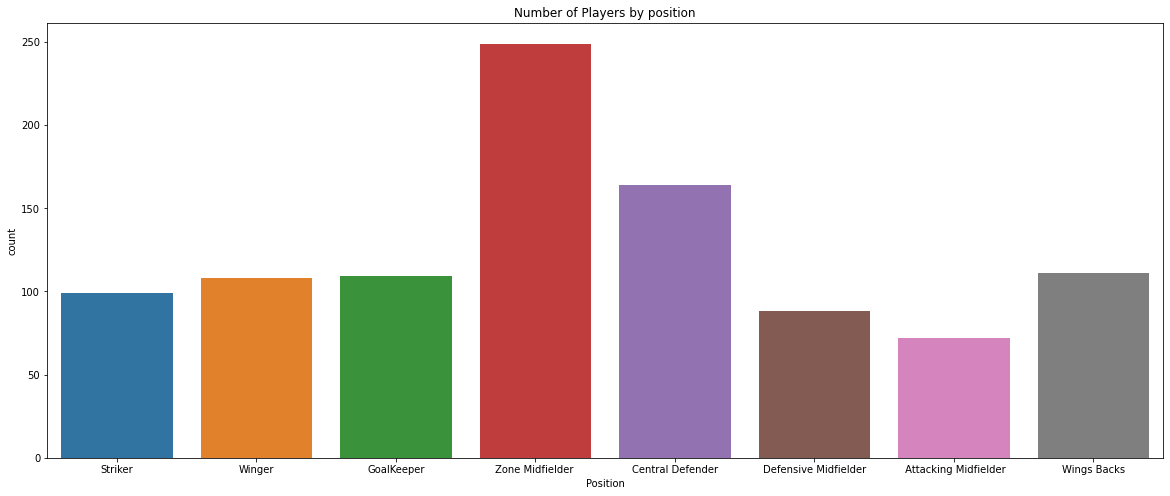

In [28]:
# Count number of players in each position using countplot
plt.figure(figsize=(20, 8))
plt.title("Number of Players by position")
fig = sns.countplot(x = 'Position', data =FIFA_data)

LESSON LEARNT: 

I noticed that most of the players are  zone midfielders and defenders  which makes sense and is expected during the formation of a good and health football team, and since that in every team we need less strikers.



In [29]:
# Define categorical skills base on the rating
def categorize_skill(df,column):
    bins = (10,30,50,70,100)
    group_names = ['Low','Moderate','High','VeryHigh']
    categories = pd.cut(df[column],bins,labels=group_names)
    new_column = column+'_cat'
    df[new_column]=categories
categorize_skill(FIFA_data,"Finishing")
categorize_skill(FIFA_data,"Strength")
categorize_skill(FIFA_data,"FKAccuracy")

In [1]:
# Box plot skills by position
f, axes = plt.subplots(2, 2, figsize=(30, 20), sharex=False)
sns.despine(left=True)
sns.boxplot('Position', 'Jumping', data = FIFA_data, ax=axes[0, 0])
sns.boxplot('Position', 'Age', data = FIFA_data, ax=axes[0, 1])
sns.boxplot('Position', 'Height', data = FIFA_data, ax=axes[1, 0])
sns.boxplot('Position', 'Weight', data = FIFA_data, ax=axes[1, 1])

NameError: ignored

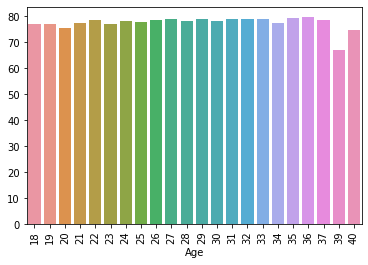

In [30]:
# Bar plot Reaction by Age
mean_value_per_age = FIFA_data.groupby('Age')['Reactions'].mean()
p = sns.barplot(x = mean_value_per_age.index, y = mean_value_per_age.values)
p = plt.xticks(rotation=90)

NOTED:

From the plot above, we noticed are ranging age from 18 to 40 years with an interesting fact that 36 years with most players in the dataset. 

SIGNIFICANCE: 

We noticed that most players are old enough according to the dataset compared to other younger players. This means they is a need to find new talents to help the and take the stick from older player to keep football more entaintment and refreshing.

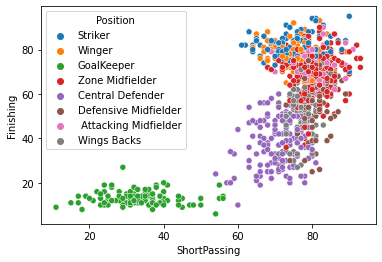

In [31]:
#Scatter plot Finishing by shortPassing classified by position
ax = sns.scatterplot(x="ShortPassing", y="Finishing", hue="Position",data=FIFA_data)

ANAYSIS:

There is high correlations between players position in midfilders and short passing compared to other relative positions, It makes sense that Midfielders are likely to take shortt passes compared to other positions.

In [32]:
FIFA_data2 = FIFA_data

# **Divide and Train Dataset**

* My expected test size would be 20% from the data which from a simple research and analysis the most most recommended into the field.

* In the later, I will use 80% as training data and 20% for testings.




In [33]:
FIFA_data2.head()

,Age,Preferred Foot,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Finishing_cat,Strength_cat,FKAccuracy_cat
0,31,0,Striker,170.0,159,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,VeryHigh,High,VeryHigh
1,33,1,Striker,188.0,183,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,VeryHigh,VeryHigh,VeryHigh
2,26,1,Winger,175.0,150,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,VeryHigh,Moderate,VeryHigh
3,27,1,GoalKeeper,193.0,168,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,Low,High,Low
4,27,1,Zone Midfielder,180.0,154,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,VeryHigh,VeryHigh,VeryHigh


In [34]:
# Divide the data to train and test

# Drop the elements that has been created for Finishing, Strength and Freekick Accurancy
drop_elements = ['Finishing_cat', 'Strength_cat', 'FKAccuracy_cat']
FIFA_data2=FIFA_data2.drop(drop_elements, axis = 1)

# Generate the unique values for the positions encoded as Defender:0, Midfielder:1, Striker:2
positions = FIFA_data2["Position"].unique()
encoder = preprocessing.LabelEncoder()
FIFA_data2['Position'] = encoder.fit_transform(FIFA_data2['Position'])

#The Y feature is the position
y = FIFA_data2["Position"]

#The other features are all but the position
FIFA_data2.drop(columns=["Position"],inplace=True)

#Split the data
X_train_dev, X_test, y_train_dev, y_test = train_test_split(FIFA_data2, y, 
                                                    test_size=0.20, 
                                                    random_state=42 )

In [35]:
FIFA_data2.head()

,Age,Preferred Foot,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,31,0,170.0,159,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26
1,33,1,188.0,183,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23
2,26,1,175.0,150,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33
3,27,1,193.0,168,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13
4,27,1,180.0,154,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51


# Model Application and Hyper tuning

In this part I will train different exisitng models, find their  best score performance, tune the hyper parameters.

I will be using the following plan;


*   Define functions that i will be using to help with the models.
*   The functions will help to train the models.
*   Evaluate the models and find the best performance scores.
*   Lastly, plot the curves to look for an important aspect to focus on.





In [36]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [37]:
# plotting validation curve
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training Error')
    plt.plot(ticks, test_scores_mean, 'r-', label='Validation Error')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()

def plot_validation_curve(clf, X, y, param_name, param_range, scoring='accuracy'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=4, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=4))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=14)
    ax.text(3, -0.94, 'Underfitting', fontsize=14)
    ax.axvline(7, ls='--')
    plt.tight_layout()

In [38]:
# Plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    sns.set(font_scale=1.4)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 16})
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

Train the model and score

This function is responisble for traing the model and scoring it. We print at the end the Accuracy and F1 Score metrics.

In [39]:
# function to calculate the score
def train_and_score(clf,X_train,y_train,X_test,y_test):
    clf = clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    cf = confusion_matrix(y_test,preds)

    print(plot_confusion_matrix(cf, class_names=positions))

    print(" Accuracy: ",accuracy_score(y_test, preds))
    print(" F1 score: ",metrics.f1_score(y_test, preds,average='weighted'))

**MODELS**

1. LINEAR REGRESSION

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Figure(720x504)
 Accuracy:  0.72
 F1 score:  0.7125778184280368


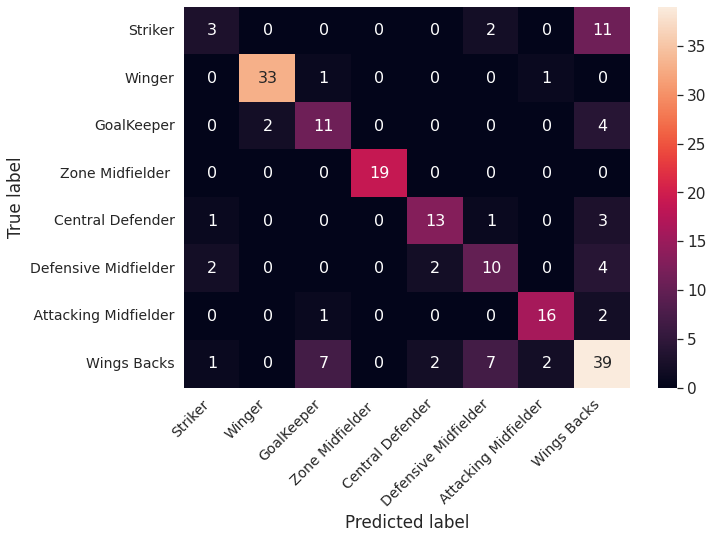

In [40]:
LR = LogisticRegressionCV(cv=5,random_state=20, solver='lbfgs',
                             multi_class='multinomial')
train_and_score(LR,X_train_dev,y_train_dev,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

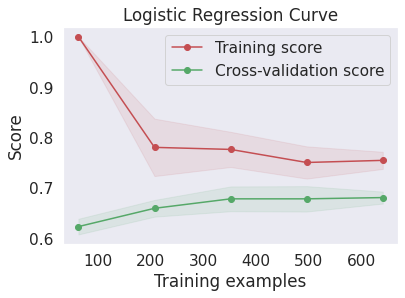

In [41]:
plot_learning_curve(LR, "Logistic Regression Curve", X_train_dev, y_train_dev)

In [42]:
LR.fit(FIFA_data2, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=20, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [47]:
FIFA_data.head(17)

,Age,Preferred Foot,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Finishing_cat,Strength_cat,FKAccuracy_cat
0,31,0,Striker,170.0,159,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,VeryHigh,High,VeryHigh
1,33,1,Striker,188.0,183,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,VeryHigh,VeryHigh,VeryHigh
2,26,1,Winger,175.0,150,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,VeryHigh,Moderate,VeryHigh
3,27,1,GoalKeeper,193.0,168,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,Low,High,Low
4,27,1,Zone Midfielder,180.0,154,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,VeryHigh,VeryHigh,VeryHigh
5,27,1,Striker,173.0,163,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22,VeryHigh,High,VeryHigh
6,32,1,Zone Midfielder,173.0,146,86,72,55,93,76,90,85,78,88,93,80,72,93,90,94,79,68,89,58,82,62,83,79,92,82,84,60,76,73,VeryHigh,High,VeryHigh
7,31,1,Winger,183.0,190,77,93,77,82,88,87,86,84,64,90,86,75,82,92,83,86,69,90,83,85,87,41,92,84,85,85,62,45,38,VeryHigh,VeryHigh,VeryHigh
8,32,1,Central Defender,183.0,181,66,60,91,78,66,63,74,72,77,84,76,75,78,85,66,79,93,84,83,59,88,90,60,63,75,82,87,92,91,High,VeryHigh,VeryHigh
9,25,1,GoalKeeper,188.0,192,13,11,15,29,13,12,13,14,26,16,43,60,67,86,49,22,76,41,78,12,34,19,11,70,11,70,27,12,18,Low,VeryHigh,Low


In [44]:
LR.predict(FIFA_data2)

array([4, 4, 4, 3, 7, 5, 7, 4, 1, 3, 4, 7, 1, 0, 2, 4, 4, 4, 3, 3, 2, 4,
       3, 4, 1, 5, 5, 2, 7, 7, 7, 0, 7, 4, 1, 6, 7, 3, 4, 1, 3, 3, 1, 4,
       1, 7, 3, 4, 4, 6, 5, 1, 7, 7, 1, 5, 7, 3, 5, 1, 5, 7, 1, 2, 6, 7,
       4, 7, 7, 6, 1, 1, 7, 1, 0, 2, 7, 1, 7, 7, 5, 3, 6, 7, 7, 6, 7, 4,
       1, 1, 7, 7, 3, 4, 7, 1, 7, 7, 4, 7, 4, 7, 1, 7, 1, 4, 6, 1, 1, 4,
       1, 1, 6, 1, 7, 1, 5, 7, 6, 1, 2, 7, 7, 6, 4, 5, 3, 1, 3, 7, 4, 3,
       2, 3, 7, 6, 7, 5, 7, 4, 0, 3, 7, 2, 0, 4, 1, 3, 4, 3, 1, 7, 1, 7,
       5, 7, 5, 0, 1, 4, 1, 7, 7, 7, 5, 1, 7, 5, 7, 7, 7, 7, 7, 5, 5, 1,
       7, 3, 7, 7, 3, 1, 1, 0, 7, 7, 7, 2, 1, 3, 7, 1, 6, 5, 7, 7, 3, 3,
       2, 7, 6, 3, 1, 2, 4, 7, 4, 2, 7, 1, 3, 0, 3, 3, 3, 1, 2, 2, 3, 0,
       7, 0, 3, 1, 3, 3, 1, 7, 7, 3, 2, 1, 3, 5, 7, 2, 5, 3, 6, 1, 5, 6,
       2, 7, 7, 1, 7, 6, 1, 2, 7, 5, 4, 7, 7, 7, 7, 1, 6, 1, 6, 1, 7, 7,
       1, 4, 3, 4, 4, 7, 5, 0, 7, 1, 1, 4, 6, 1, 7, 3, 7, 1, 7, 7, 7, 3,
       7, 2, 7, 7, 6, 6, 0, 0, 7, 7, 7, 7, 7, 2, 1,

2. Neural Networks

In [ ]:
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100, 70), random_state=1)
train_and_score(MLP,X_train_dev,y_train_dev,X_test,y_test)

In [ ]:
plot_learning_curve(MLP, "Neural Network Curve", X_train_dev, y_train_dev)

In [ ]:
#create new a knn model
knn_model = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
KNN = GridSearchCV(knn_model, param_grid, cv=5)

train_and_score(KNN,X_train_dev,y_train_dev,X_test,y_test)

In [ ]:
plot_learning_curve(KNN, "KNN Regression Curve", X_train_dev, y_train_dev)

In [ ]:
plot_validation_curve(KNeighborsClassifier(), X_train_dev, y_train_dev, param_name='n_neighbors', param_range=range(2,25))

**Decision Tree**

In [ ]:
def min_impurity(X,y):
    tr_acc = []
    mln_set = range(75,90)                                 

    for minImp in mln_set:
        clf = tree.DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=minImp/100000)
        scores = cross_val_score(clf, X, y, cv=10)
        tr_acc.append(scores.mean())

    best_mln = mln_set[np.argmax(tr_acc)]
    return best_mln

best_min= min_impurity(X_train_dev,y_train_dev)

In [ ]:
DT = tree.DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=best_min/100000)
train_and_score(DT,X_train_dev,y_train_dev,X_test,y_test)

In [ ]:
plot_learning_curve(DT, "Decision Tree Learning Curve", X_train_dev, y_train_dev)

**Bagging**

In [ ]:
DTBG = BaggingClassifier(tree.DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=best_min/100000))#
train_and_score(DTBG,X_train_dev,y_train_dev,X_test,y_test)

In [ ]:
plot_learning_curve(DTBG, "Bagging Decision Tree Learning Curve", X_train_dev, y_train_dev)

In [ ]:
gridsearch_forest = RandomForestClassifier()

params = {
    "n_estimators": [1, 10, 100],
    "max_depth": [5,8,15], #2,3,5 85 #5,8,10 88 #5 8 15 89
    "min_samples_leaf" : [1, 2, 4]
}

RF = GridSearchCV(gridsearch_forest, param_grid=params, cv=5 )
train_and_score(RF,X_train_dev,y_train_dev,X_test,y_test)

In [ ]:
plot_learning_curve(RF, "Random Forest Learning Curve", X_train_dev, y_train_dev)

In [ ]:
SVM = SVC(kernel='linear', C=1)
train_and_score(SVM,X_train_dev,y_train_dev,X_test,y_test)

In [ ]:
plot_learning_curve(SVM, "SVM Curve", X_train_dev, y_train_dev)

In [ ]:
plt.style.use('ggplot')
get_ipython().run_line_magic('matplotlib', 'inline')
plt.figure()

y1_test=y_test[(y_test ==0) | (y_test ==1)]
x1_test = X_test[X_test.index.isin(y1_test.index)]


y_predict_probabilities = LR.predict_proba(x1_test)[:,1]
fpr, tpr, _ = roc_curve(y1_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='LR (area = %0.3f)' % roc_auc)

y_predict_probabilities = KNN.predict_proba(x1_test)[:,1]
fpr, tpr, _ = roc_curve(y1_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue',
         lw=2, label='KNN (area = %0.3f)' % roc_auc)

y_predict_probabilities = RF.predict_proba(x1_test)[:,1]
fpr, tpr, _ = roc_curve(y1_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='green',
         lw=2, label='RF (area = %0.3f)' % roc_auc)

y_predict_probabilities = MLP.predict_proba(x1_test)[:,1]
fpr, tpr, _ = roc_curve(y1_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='red',
         lw=2, label='NN (area = %0.3f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()